# Using color in data visualisations

In [1]:
# allows for interactive plots in the browser, working well from version 2.0 onwards
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# package to manage colour conversions
import colorspacious
from ipywidgets import interact

Reasonable color maps and palettes

![](jetArtifacts1.png)

Matplotlib now has good defaults

![](viridisNoArtifacts.png)

Procedural palettes: Seaborn & Colorbrewer Palettes, I Want Hue

In [16]:
seaborn_pal = sns.color_palette('RdBu',n_colors=7)
# Consult the seaborn documentation and http://colorbrewer2.org/

<IPython.core.display.Javascript object>


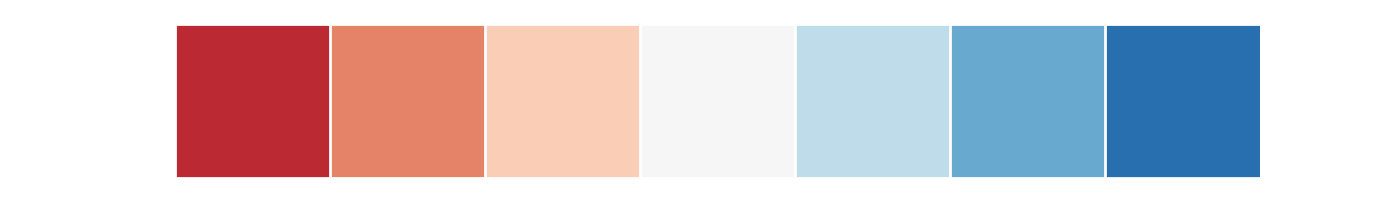

In [17]:
sns.palplot(seaborn_pal)

## Custom colormaps in LAB space

Using the LAB colour space ensures perceptual uniformity
![HSV](https://vis4.net/blog/wp-content/uploads/2011/12/equivalue-hsv.png)
![HSVbw](https://vis4.net/blog/wp-content/uploads/2011/12/equivalue-hsv-grayscale.png)

![LAB space](LABspace.gif)

Using the colorspacious library, we can generate perceptually smooth color schemes

<IPython.core.display.Javascript object>


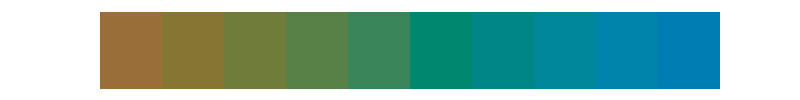

In [14]:
fig, ax = plt.subplots(figsize=(4,0.5))
@interact
def show_colormap(hue_start:(0,360), hue_end:(0,360), n_colors:(0,20), sat:(0,70)):
    n_colors = 10
    hue = np.linspace(hue_start,hue_end,n_colors)
    sat = np.ones(n_colors)*sat
    bri = np.ones(n_colors)*50
    colors_rgb = np.clip(colorspacious.cspace_convert(np.stack([bri,sat,hue]).T,
                                         start="CIELCh",
                                         end='sRGB1'),0,1)
    ax.clear()
    ax.imshow(colors_rgb[None, :,:], aspect='auto')
    ax.grid(False)
    ax.set_axis_off()

## References

[A great post on the LAB colour space](https://www.vis4.net/blog/posts/avoid-equidistant-hsv-colors/)

[Color Brewer](http://colorbrewer2.org/)

[I Want Hue](http://tools.medialab.sciences-po.fr/iwanthue/)

[Post explaining the new matplotlib colour maps](https://bids.github.io/colormap/)